In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
import sklearn.metrics as sm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# Dataset with the most significant features.
adni_data = pd.read_csv('../../data/tabular_data/clustering_DF.csv')

In [3]:
adni_data.head()

RID   Phase VISCODE   DX diagnosis  year_of_birth  PTGENDER  PTEDUCAT  \
0    2  ADNIGO     m60  1.0        NC           1931       1.0      16.0   
1    2   ADNI2     v06  1.0        NC           1931       1.0      16.0   
2    2   ADNI2     v11  2.0       MCI           1931       1.0      16.0   
3    2   ADNI2     v21  1.0        NC           1931       1.0      16.0   
4    2   ADNI2     v41  1.0        NC           1931       1.0      16.0   

   PTRACCAT  CDMEMORY  ...    AVTOT5    AVTOT4    AVTOT6    AVTOT3  \
0       5.0  0.000000  ...  0.666667  0.466667  0.466667  0.533333   
1       5.0  0.000000  ...  0.600000  0.600000  0.000000  0.600000   
2       5.0  0.166667  ...  0.666667  0.600000  0.533333  0.533333   
3       5.0  0.000000  ...  0.600000  0.533333  0.400000  0.533333   
4       5.0  0.000000  ...  0.666667  0.533333  0.400000  0.400000   

   AVDEL30MIN  AVDELTOT    AVTOT2  CATANIMSC  TRABSCOR  LDELCUE  
0    0.166667  0.533333  0.466667   0.200000  0.166667      0.0  
1    0.111111  0.666667  0.600000   0.150000  0.064257      0.0  
2    0.083333  0.533333  0.333333   0.200000  0.133534      0.0  
3    0.083333  0.733333  0.466667   0.133333  0.167671      0.0  
4    0.055556  0.733333  0.333333   0.133333  0.162651      0.0  

[5 rows x 28 columns]

In [4]:
adni_data['DX'] = adni_data['DX'].astype('category')

In [5]:
adni_data.iloc[:, 9:]

CDMEMORY  CDGLOBAL   MMSCORE  WORD2DL  MMDATE  MOCASCORE  DATE  \
0     0.000000  0.000000  0.933333      1.0     1.0   0.766667   1.0   
1     0.000000  0.000000  0.766667      0.0     1.0   0.733333   1.0   
2     0.166667  0.166667  0.800000      0.0     0.0   0.766667   1.0   
3     0.000000  0.000000  0.833333      0.0     1.0   0.666667   1.0   
4     0.000000  0.000000  0.933333      1.0     1.0   0.733333   1.0   
...        ...       ...       ...      ...     ...        ...   ...   
4167  0.166667  0.166667  0.900000      1.0     0.0   0.666667   0.0   
4168  0.166667  0.166667  0.866667      1.0     1.0   0.700000   1.0   
4169  0.333333  0.166667  0.833333      0.0     0.0   0.700000   0.0   
4170  0.333333  0.166667  1.000000      1.0     1.0   0.833333   1.0   
4171  0.166667  0.166667  1.000000      1.0     1.0   1.000000   1.0   

      LDELTOTAL  LIMMTOTAL    AVTOT5    AVTOT4    AVTOT6    AVTOT3  \
0          0.48       0.72  0.666667  0.466667  0.466667  0.533333   
1          0.56       0.60  0.600000  0.600000  0.000000  0.600000   
2          0.40       0.52  0.666667  0.600000  0.533333  0.533333   
3          0.48       0.56  0.600000  0.533333  0.400000  0.533333   
4          0.48       0.44  0.666667  0.533333  0.400000  0.400000   
...         ...        ...       ...       ...       ...       ...   
4167       0.20       0.32  0.600000  0.400000  0.333333  0.400000   
4168       0.20       0.36  0.666667  0.733333  0.066667  0.466667   
4169       0.00       0.12  0.333333  0.333333  0.000000  0.266667   
4170       0.04       0.44  0.533333  0.533333  0.200000  0.400000   
4171       0.24       0.48  0.733333  0.666667  0.600000  0.600000   

      AVDEL30MIN  AVDELTOT    AVTOT2  CATANIMSC  TRABSCOR  LDELCUE  
0       0.166667  0.533333  0.466667   0.200000  0.166667      0.0  
1       0.111111  0.666667  0.600000   0.150000  0.064257      0.0  
2       0.083333  0.533333  0.333333   0.200000  0.133534      0.0  
3       0.083333  0.733333  0.466667   0.133333  0.167671      0.0  
4       0.055556  0.733333  0.333333   0.133333  0.162651      0.0  
...          ...       ...       ...        ...       ...      ...  
4167    0.000000  0.666667  0.400000   0.216667  0.092369      0.0  
4168    0.000000  0.733333  0.333333   0.383333  0.154618      0.0  
4169    0.000000  0.266667  0.266667   0.383333  0.176707      1.0  
4170    0.027778  0.800000  0.466667   0.383333  0.083333      0.0  
4171    0.194444  0.866667  0.466667   0.533333  0.056225      0.0  

[4172 rows x 19 columns]

In [6]:
categorical_cols = ['WORD2DL', 'MMDATE', 'DATE', 'LDELCUE']
adni_data.drop(categorical_cols, axis=1, inplace=True)

In [7]:
adni_data.head()

RID   Phase VISCODE   DX diagnosis  year_of_birth  PTGENDER  PTEDUCAT  \
0    2  ADNIGO     m60  1.0        NC           1931       1.0      16.0   
1    2   ADNI2     v06  1.0        NC           1931       1.0      16.0   
2    2   ADNI2     v11  2.0       MCI           1931       1.0      16.0   
3    2   ADNI2     v21  1.0        NC           1931       1.0      16.0   
4    2   ADNI2     v41  1.0        NC           1931       1.0      16.0   

   PTRACCAT  CDMEMORY  ...  LIMMTOTAL    AVTOT5    AVTOT4    AVTOT6    AVTOT3  \
0       5.0  0.000000  ...       0.72  0.666667  0.466667  0.466667  0.533333   
1       5.0  0.000000  ...       0.60  0.600000  0.600000  0.000000  0.600000   
2       5.0  0.166667  ...       0.52  0.666667  0.600000  0.533333  0.533333   
3       5.0  0.000000  ...       0.56  0.600000  0.533333  0.400000  0.533333   
4       5.0  0.000000  ...       0.44  0.666667  0.533333  0.400000  0.400000   

   AVDEL30MIN  AVDELTOT    AVTOT2  CATANIMSC  TRABSCOR  
0    0.166667  0.533333  0.466667   0.200000  0.166667  
1    0.111111  0.666667  0.600000   0.150000  0.064257  
2    0.083333  0.533333  0.333333   0.200000  0.133534  
3    0.083333  0.733333  0.466667   0.133333  0.167671  
4    0.055556  0.733333  0.333333   0.133333  0.162651  

[5 rows x 24 columns]

In [8]:
adni_data.groupby('DX').count()


RID  Phase  VISCODE  diagnosis  year_of_birth  PTGENDER  PTEDUCAT  \
DX                                                                        
1.0  1627   1627     1627       1627           1627      1627      1627   
2.0  1932   1932     1932       1932           1932      1932      1932   
3.0   613    613      613        613            613       613       613   

     PTRACCAT  CDMEMORY  CDGLOBAL  ...  LIMMTOTAL  AVTOT5  AVTOT4  AVTOT6  \
DX                                 ...                                      
1.0      1627      1627      1627  ...       1627    1627    1627    1627   
2.0      1932      1932      1932  ...       1932    1932    1932    1932   
3.0       613       613       613  ...        613     613     613     613   

     AVTOT3  AVDEL30MIN  AVDELTOT  AVTOT2  CATANIMSC  TRABSCOR  
DX                                                              
1.0    1627        1627      1627    1627       1627      1627  
2.0    1932        1932      1932    1932       1932      1932  
3.0     613         613       613     613        613       613  

[3 rows x 23 columns]

### Participant information: number of unique participants and number of entries per diagnosis

In [9]:
print('There are', adni_data.RID.nunique(), 'participants included in this analysis.')
print('Based on the dementia diagnosis, we have:')
print('- 1627 entries for normal controls, \n- 1932 entries for mildly cognitively impaired, and \n- 613 entries for Alzheimer\'s patients.')


There are 1350 participants included in this analysis.
Based on the dementia diagnosis, we have:
- 1627 entries for normal controls, 
- 1932 entries for mildly cognitively impaired, and 
- 613 entries for Alzheimer's patients.


In [10]:
data = adni_data.iloc[:, 9:].values
feature = adni_data.iloc[:, 4].values

In [11]:
data.shape

(4172, 15)

In [12]:
df = adni_data.iloc[:, 9:]
columns = adni_data.iloc[:, 9:].columns
columns

Index(['CDMEMORY', 'CDGLOBAL', 'MMSCORE', 'MOCASCORE', 'LDELTOTAL',
       'LIMMTOTAL', 'AVTOT5', 'AVTOT4', 'AVTOT6', 'AVTOT3', 'AVDEL30MIN',
       'AVDELTOT', 'AVTOT2', 'CATANIMSC', 'TRABSCOR'],
      dtype='object')

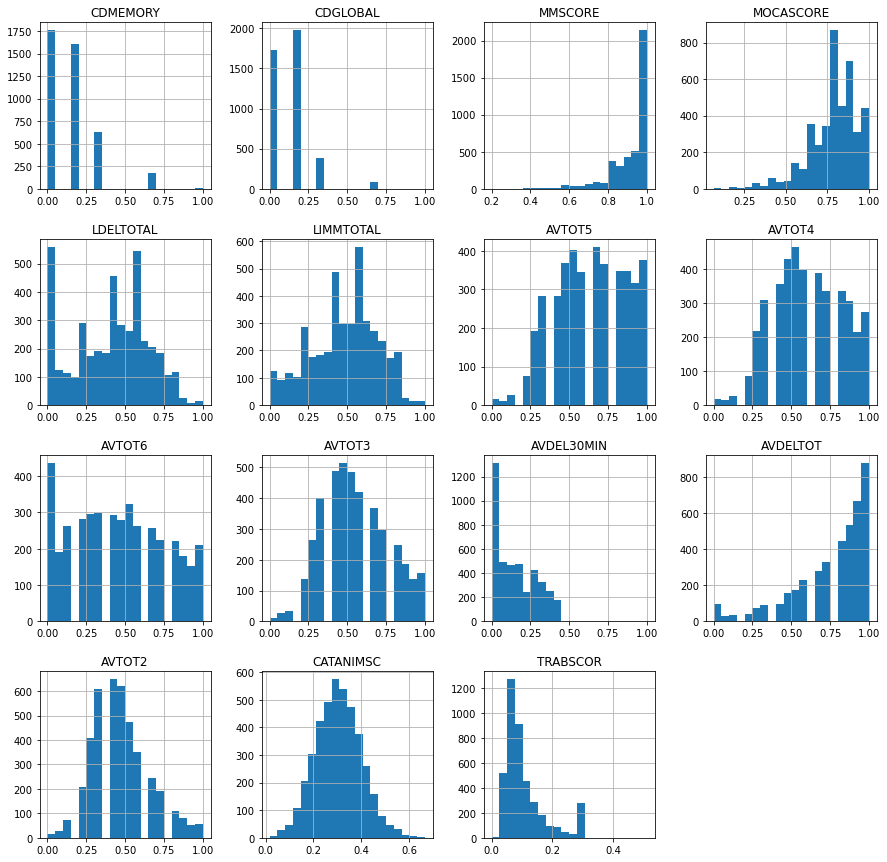

In [13]:
df.hist(figsize=(15,15),bins=20)
a=1

In [14]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

### K-Means Clustering: Elbow Method

In [15]:
# How many clusters? Visualize the elbow.
distortions = []
K = range(1,14)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

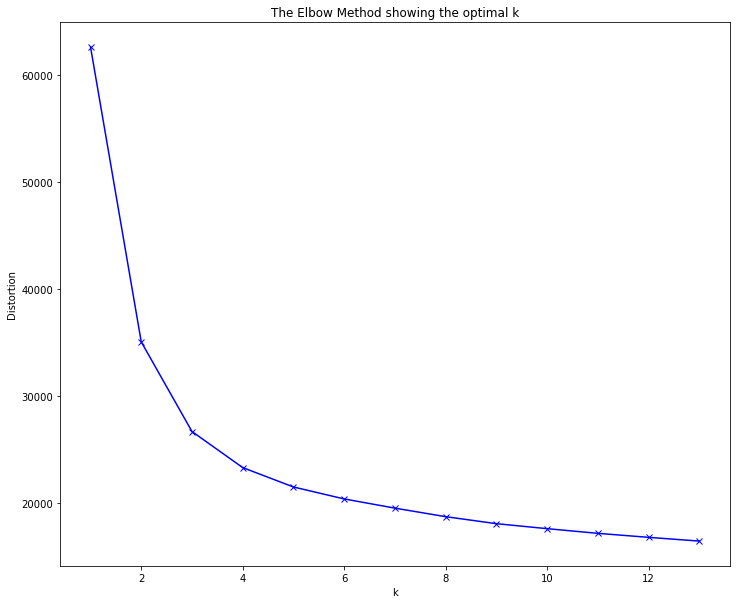

In [16]:
# Plotting the distortions of K-Means.
plt.figure(figsize=(12,10))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [17]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(data)
kmeanModel.labels_

array([2, 2, 2, ..., 1, 2, 0])

In [18]:
adni_data['Label'] = kmeanModel.labels_
adni_data['Label'] = adni_data['Label'].astype('category')
adni_data.head()

RID   Phase VISCODE   DX diagnosis  year_of_birth  PTGENDER  PTEDUCAT  \
0    2  ADNIGO     m60  1.0        NC           1931       1.0      16.0   
1    2   ADNI2     v06  1.0        NC           1931       1.0      16.0   
2    2   ADNI2     v11  2.0       MCI           1931       1.0      16.0   
3    2   ADNI2     v21  1.0        NC           1931       1.0      16.0   
4    2   ADNI2     v41  1.0        NC           1931       1.0      16.0   

   PTRACCAT  CDMEMORY  ...    AVTOT5    AVTOT4    AVTOT6    AVTOT3  \
0       5.0  0.000000  ...  0.666667  0.466667  0.466667  0.533333   
1       5.0  0.000000  ...  0.600000  0.600000  0.000000  0.600000   
2       5.0  0.166667  ...  0.666667  0.600000  0.533333  0.533333   
3       5.0  0.000000  ...  0.600000  0.533333  0.400000  0.533333   
4       5.0  0.000000  ...  0.666667  0.533333  0.400000  0.400000   

   AVDEL30MIN  AVDELTOT    AVTOT2  CATANIMSC  TRABSCOR  Label  
0    0.166667  0.533333  0.466667   0.200000  0.166667      2  
1    0.111111  0.666667  0.600000   0.150000  0.064257      2  
2    0.083333  0.533333  0.333333   0.200000  0.133534      2  
3    0.083333  0.733333  0.466667   0.133333  0.167671      2  
4    0.055556  0.733333  0.333333   0.133333  0.162651      2  

[5 rows x 25 columns]

In [19]:
# 3 clusters plotted against year of birth
px.scatter(adni_data, 
           x='year_of_birth', 
           y='LIMMTOTAL', 
           color='Label',
           color_discrete_sequence=[
               '#27b052', 'blue', '#ff6361'],
           labels=dict(year_of_birth='Year of Birth', LIMMTOTAL='Normalized logical memory score', Label='Cluster'),
           title='Clusters predicted with K-Means, logical memory score per age')

In [20]:
diagnosis = {1: 'NC', 2: 'MCI', 3: 'AD'}
adni_data['Diagnosis'] = adni_data['DX'].map(diagnosis)

px.scatter(adni_data, 
           x='year_of_birth', 
           y='LIMMTOTAL',  
           color='Diagnosis', 
           color_discrete_sequence=[
               'blue', '#27b052', '#ff6361'],
           labels=dict(year_of_birth='Year of Birth', LIMMTOTAL='Normalized logical memory score', Label='Cluster'),
           title='Diagnosis-based groups, logical memory score per age')



In [21]:
from sklearn.metrics import confusion_matrix

actual = adni_data['Diagnosis']
cluster = adni_data['Label']

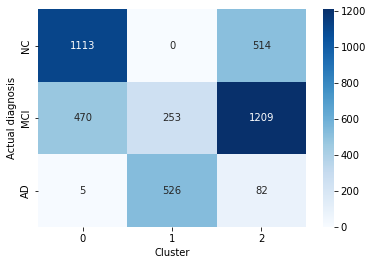

In [22]:
confusion_matrix = pd.crosstab(actual, cluster, rownames=['Actual diagnosis'], colnames=['Cluster'])

sns.heatmap(confusion_matrix, fmt='', cmap='Blues', annot=True)
plt.show()

In [23]:
from sklearn.metrics import silhouette_score
actual = (adni_data[['LDELTOTAL',
                     'LIMMTOTAL',
                     'MMSCORE',
                     'MOCASCORE',
                     'AVTOT5',
                     'AVTOT6',
                     'AVTOT4',
                     'AVTOT3',
                     'AVDELTOT',
                     'AVDEL30MIN',
                     'AVTOT2',
                     'CDGLOBAL',
                     'CDMEMORY']])


cluster = adni_data['Label'].to_numpy().reshape(-1, 1)

# The distance between a sample and the nearest cluster that the sample is not a part of.
score = silhouette_score(actual, cluster, metric='euclidean')
score

C:\Users\kfatur\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.30486584013367546

In [24]:
# What if we take 4 clusters?
kmeanModel = KMeans(n_clusters=4)
kmeanModel.fit(data)
kmeanModel.labels_

adni_data['Label'] = kmeanModel.labels_
adni_data['Label'] = adni_data['Label'].astype('category')
adni_data.head()

RID   Phase VISCODE   DX diagnosis  year_of_birth  PTGENDER  PTEDUCAT  \
0    2  ADNIGO     m60  1.0        NC           1931       1.0      16.0   
1    2   ADNI2     v06  1.0        NC           1931       1.0      16.0   
2    2   ADNI2     v11  2.0       MCI           1931       1.0      16.0   
3    2   ADNI2     v21  1.0        NC           1931       1.0      16.0   
4    2   ADNI2     v41  1.0        NC           1931       1.0      16.0   

   PTRACCAT  CDMEMORY  ...    AVTOT4    AVTOT6    AVTOT3  AVDEL30MIN  \
0       5.0  0.000000  ...  0.466667  0.466667  0.533333    0.166667   
1       5.0  0.000000  ...  0.600000  0.000000  0.600000    0.111111   
2       5.0  0.166667  ...  0.600000  0.533333  0.533333    0.083333   
3       5.0  0.000000  ...  0.533333  0.400000  0.533333    0.083333   
4       5.0  0.000000  ...  0.533333  0.400000  0.400000    0.055556   

   AVDELTOT    AVTOT2  CATANIMSC  TRABSCOR  Label  Diagnosis  
0  0.533333  0.466667   0.200000  0.166667      3         NC  
1  0.666667  0.600000   0.150000  0.064257      3         NC  
2  0.533333  0.333333   0.200000  0.133534      1        MCI  
3  0.733333  0.466667   0.133333  0.167671      3         NC  
4  0.733333  0.333333   0.133333  0.162651      3         NC  

[5 rows x 26 columns]

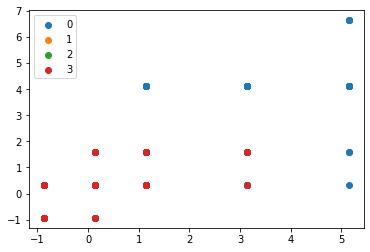

In [25]:
k_means_labels = kmeanModel.labels_

adni_data['Label'] = kmeanModel.labels_
adni_data['Label'] = adni_data['Label'].astype('category')
adni_data.head()
label = kmeanModel.fit_predict(data)
# Plot result
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.legend()
plt.show()

In [26]:
px.scatter(adni_data, 
           x='year_of_birth', 
           y='LIMMTOTAL', 
           color='Label',
           color_discrete_sequence=[
               'orange', '#27b052', 'blue', '#ff6361'],
           title='Clusters predicted with K-Means, y axis represents logical memory score')

In [27]:
px.scatter(adni_data, 
           x='year_of_birth', 
           y='LIMMTOTAL',  
           color='Diagnosis', 
           color_discrete_sequence=[
               'blue', '#27b052', '#ff6361'],
           title='Groups based on diagnosis')

In [28]:
px.scatter(adni_data, 
           x='year_of_birth', 
           y='AVTOT5', 
           color='Label',
           color_discrete_sequence=[
               'orange', '#27b052', 'blue', '#ff6361'],
           title='Clusters predicted with K-Means and their results in Rey Auditory Verbal Learning Test, trial 5')

In [29]:
px.scatter(adni_data, 
           x='year_of_birth', 
           y='AVTOT5',  
           color='Diagnosis', 
           color_discrete_sequence=[
               'blue', '#27b052', '#ff6361'],
           title='Groups based on diagnosis and their results in Rey Auditory Verbal Learning Test, trial 5')

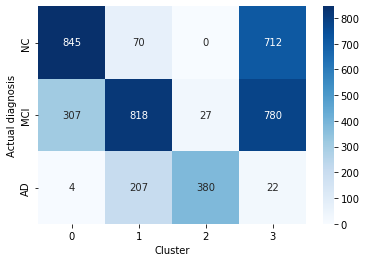

In [30]:
actual = adni_data['Diagnosis']
cluster = adni_data['Label']
confusion_matrix = pd.crosstab(actual, cluster, rownames=['Actual diagnosis'], colnames=['Cluster'])

sns.heatmap(confusion_matrix, fmt='', cmap='Blues', annot=True)
plt.show()

In [31]:
from sklearn.metrics import silhouette_score
actual = (adni_data[['LDELTOTAL',
                     'LIMMTOTAL',
                     'MMSCORE',
                     'MOCASCORE',
                     'AVTOT5',
                     'AVTOT6',
                     'AVTOT4',
                     'AVTOT3',
                     'AVDELTOT',
                     'AVDEL30MIN',
                     'AVTOT2',
                     'CDGLOBAL',
                     'CDMEMORY']])


cluster = adni_data['Label'].to_numpy().reshape(-1, 1)

# The distance between a sample and the nearest cluster that the sample is not a part of.
score = silhouette_score(actual, cluster, metric='euclidean')
score

C:\Users\kfatur\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.23977985996770004

"The Silhouette Coefficient is bounded between 1 and -1. The best value is 1, the worst is -1. A higher score indicates that the model has better defined, more dense clusters. Values close to 0 indicate overlapping clusters, while negative values usually indicate that data points have been assigned to the wrong clusters." [Source](https://medium.com/@tarammullin/dbscan-2788cfce9389)

There are a couple of things we can improve:
1. Reduce dimensionality
2. Choose a clustering algorithm less sensitive to noise, outliers and non-normal distribution.

Let's try another kind of clustering, since our data is not well differentiated (especially MCI and NC seem to present a lot of noise for K-Means).

"Why DBSCAN? 
Partitioning methods (K-means, PAM clustering) and hierarchical clustering work for finding spherical-shaped clusters or convex clusters. In other words, they are suitable only for compact and well-separated clusters. Moreover, they are also severely affected by the presence of noise and outliers in the data." [Source](https://www.geeksforgeeks.org/dbscan-clustering-in-ml-density-based-clustering/)

### PCA

In [32]:
# First center and scale the data.
scaled_data = preprocessing.scale(data)

In [33]:
pca = PCA()
pca_out = pca.fit(scaled_data)
pca_data = pca.fit_transform(scaled_data) # get PCA coordinates for scaled_data

In [34]:
pca_data.shape

(4172, 15)

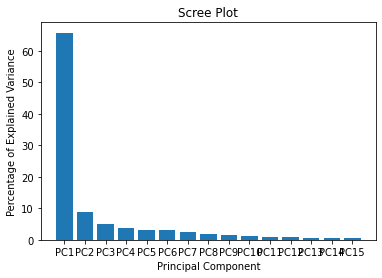

In [35]:
# Draw a scree plot.
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [36]:
# pca_data = pca_data[:, :3]

In [37]:
# Proportion of Variance (from PC1 to PC15)
pca_out.explained_variance_ratio_

array([0.65825453, 0.08826801, 0.0503492 , 0.0388417 , 0.03131605,
       0.03053477, 0.02353174, 0.01888399, 0.0138536 , 0.01216171,
       0.00789754, 0.00770802, 0.00689061, 0.00630878, 0.00519974])

The eigenvalues (variance explained by each principal component): usually PCs where eigenvalue is > 1 contribute greater variance and should be retained for further analysis, but the largest value we obtain is 0.65825453).

In [38]:
# Cumulative proportion of variance (from PC1 to PC15)   
np.cumsum(pca_out.explained_variance_ratio_)

array([0.65825453, 0.74652255, 0.79687175, 0.83571345, 0.8670295 ,
       0.89756427, 0.92109602, 0.93998001, 0.9538336 , 0.96599531,
       0.97389285, 0.98160087, 0.98849148, 0.99480026, 1.        ])

In [39]:
# Loadings - correlation coefficients between original variables and the component
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

PC1       PC2       PC3       PC4       PC5       PC6  \
variable                                                                 
CDMEMORY    0.245707  0.395466 -0.269608 -0.306683  0.005965  0.242228   
CDGLOBAL    0.235451  0.407955 -0.255843 -0.374967 -0.049553  0.311245   
MMSCORE    -0.248032 -0.338766 -0.096809  0.015905 -0.075886  0.265831   
MOCASCORE  -0.267180 -0.186533 -0.249414 -0.041956  0.007940  0.135984   
LDELTOTAL  -0.267832 -0.044270  0.314227 -0.490179  0.265141 -0.002015   
LIMMTOTAL  -0.266424 -0.064817  0.244591 -0.520187  0.326553 -0.004957   
AVTOT5     -0.288710  0.208074 -0.038100  0.105798  0.013801  0.038775   
AVTOT4     -0.285338  0.240558 -0.065052  0.127905  0.040904 -0.016189   
AVTOT6     -0.279526  0.262620  0.062278  0.068812 -0.052002  0.019117   
AVTOT3     -0.279214  0.267395 -0.086302  0.154647  0.103831 -0.084263   
AVDEL30MIN -0.264892  0.318301  0.065445  0.096280 -0.074194  0.008317   
AVDELTOT   -0.238954  0.014402  0.325797 -0.012632 -0.609773  0.532562   
AVTOT2     -0.260507  0.284997 -0.143991  0.164276  0.203652 -0.158929   
CATANIMSC  -0.222861 -0.094576 -0.395103 -0.398160 -0.557192 -0.545227   
TRABSCOR    0.207140  0.296882  0.572221 -0.036200 -0.264832 -0.373914   

                 PC7       PC8       PC9      PC10      PC11      PC12  \
variable                                                                 
CDMEMORY    0.097708  0.013358  0.021008 -0.009930  0.049206 -0.128695   
CDGLOBAL    0.148374  0.003281 -0.079478  0.062041 -0.040523  0.095207   
MMSCORE     0.588377  0.105773 -0.415186  0.443961  0.056673 -0.036736   
MOCASCORE   0.415061  0.233765  0.627547 -0.431742 -0.035932 -0.020203   
LDELTOTAL  -0.056809  0.018488  0.011355  0.030110  0.046106  0.000546   
LIMMTOTAL  -0.036802 -0.098732 -0.021552 -0.024633 -0.001357  0.017800   
AVTOT5      0.018076  0.078270 -0.349211 -0.335041 -0.266924  0.392583   
AVTOT4      0.067845 -0.067756 -0.315661 -0.366076  0.091912  0.239394   
AVTOT6     -0.137792  0.400902 -0.063479  0.090919 -0.553318 -0.567832   
AVTOT3      0.087550 -0.269035 -0.093381 -0.132332  0.551964 -0.550656   
AVDEL30MIN -0.175131  0.525002  0.231410  0.377820  0.441018  0.321337   
AVDELTOT   -0.168168 -0.357923  0.145379 -0.037668 -0.000129 -0.002937   
AVTOT2      0.163386 -0.520897  0.333413  0.433211 -0.322391  0.178540   
CATANIMSC  -0.101281 -0.045277 -0.066321  0.043161  0.003980  0.006378   
TRABSCOR    0.563833  0.054299  0.043182 -0.072748 -0.018345  0.005359   

                PC13      PC14      PC15  
variable                                  
CDMEMORY    0.720137 -0.091123  0.040405  
CDGLOBAL   -0.650071  0.084592 -0.010264  
MMSCORE     0.075711 -0.022573 -0.002871  
MOCASCORE  -0.048469  0.009907  0.003570  
LDELTOTAL  -0.018924 -0.050751  0.712266  
LIMMTOTAL   0.049329  0.038914 -0.686511  
AVTOT5      0.163900  0.600756  0.072238  
AVTOT4     -0.057299 -0.725114 -0.022538  
AVTOT6     -0.063960 -0.119377 -0.047673  
AVTOT3     -0.098673  0.277471  0.020130  
AVDEL30MIN  0.026469  0.022300 -0.088552  
AVDELTOT    0.040127 -0.009115 -0.017307  
AVTOT2      0.031500 -0.031624  0.042313  
CATANIMSC   0.016603  0.005119  0.009359  
TRABSCOR    0.019634  0.017246 -0.034606

The positive and negative values in component loadings reflect the positive and negative correlations of the variables with the principal components.    
Except CDMEMORY, CDGLOBAL and TRABSCOR, all other variables have negative projection on PC1.

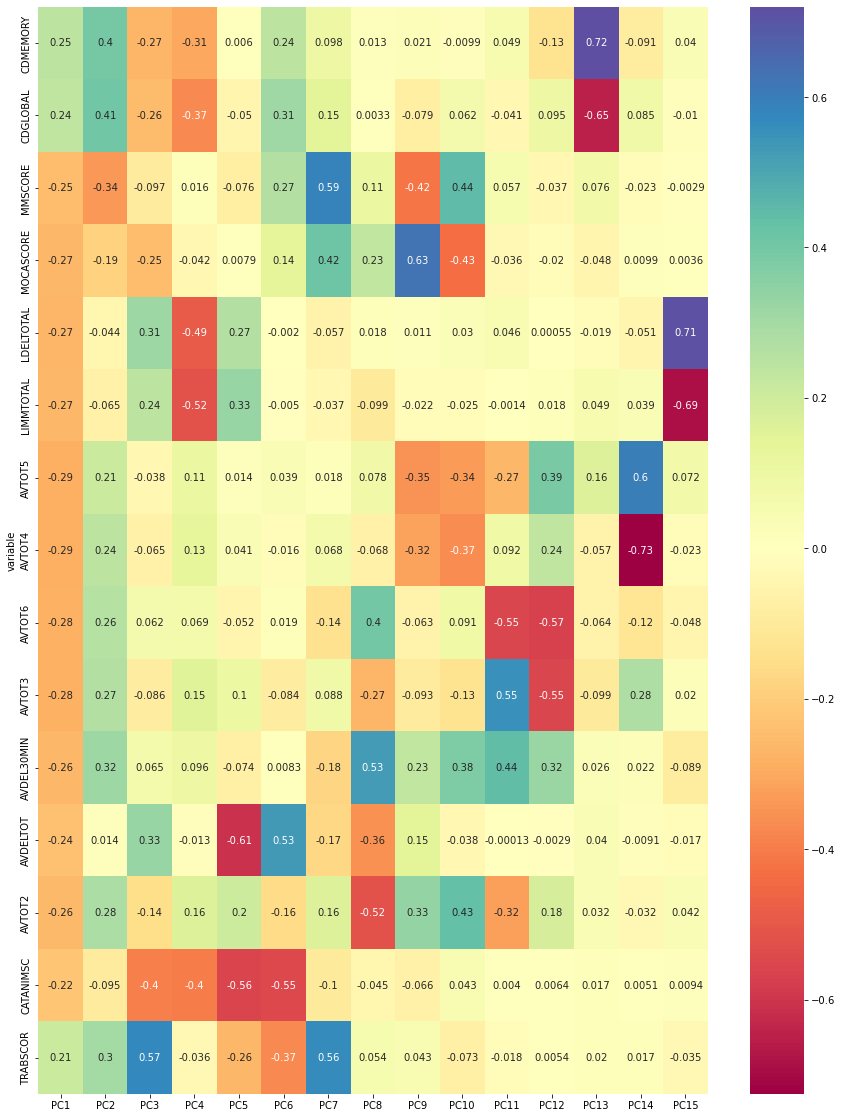

In [40]:
# Correlation matrix plot for loadings, another visualisation useful in deciding how many PCs to retain.
plt.figure(figsize=(15, 20))
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

In [41]:
var1 = round(pca_out.explained_variance_ratio_[0]*100, 2)
var2 = round(pca_out.explained_variance_ratio_[1]*100, 2), 
var3 = round(pca_out.explained_variance_ratio_[2]*100, 2)
var4 = round(pca_out.explained_variance_ratio_[3]*100, 2)
var5 = round(pca_out.explained_variance_ratio_[4]*100, 2)
var6 = round(pca_out.explained_variance_ratio_[5]*100, 2)
var7 = round(pca_out.explained_variance_ratio_[6]*100, 2)
var1 + var2 + var3 + var4 + var5 + var6 + var7

array([92.1])

The first 3 principal components contribute 79.7% of the total variation in the dataset, the first 4 PCs contribute 83.6%, and the first 5 86.7%. Only with 7 PCs we explain over 92.1% of the total variance. 

However, none of the eigenvalues is > 1. PC1 has eigenvalue of 0.65825453 and thus provides some approximation of the variation present in the original dataset, but PC2 is already low at 0.08826801. We might not be getting very good results with clustering?

There is not much redundancy in our dataset, but on the other hand, some test results are (highly) correlated. Still, we can reduce our dataset dimensions by half.

We can examine, which psychological test variables had the greatest influence on each individual PC1-PC5 and decide, which to keep. We have these values in the heatmap above already, but they are not ordered by size, so we will get them as  series.

In [42]:
# Which test features had the biggest influence on PC1?

# Top 10 measurements that contribute the most to pc1.
# First, get the loading scores.
loading_scores = pd.Series(pca.components_[0], index=columns)

## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the names of the top 10 genes
top_10_variables = sorted_loading_scores[0:10].index.values
 
## print the gene names and their scores (and +/- sign)
print('Contributing to PC1:', loading_scores[top_10_variables])

Contributing to PC1: AVTOT5       -0.288710
AVTOT4       -0.285338
AVTOT6       -0.279526
AVTOT3       -0.279214
LDELTOTAL    -0.267832
MOCASCORE    -0.267180
LIMMTOTAL    -0.266424
AVDEL30MIN   -0.264892
AVTOT2       -0.260507
MMSCORE      -0.248032
dtype: float64


In [43]:
loading_scores = pd.Series(pca.components_[1], index=columns)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_variables = sorted_loading_scores[0:10].index.values
print('Contributing to PC2:', loading_scores[top_10_variables])

Contributing to PC2: CDGLOBAL      0.407955
CDMEMORY      0.395466
MMSCORE      -0.338766
AVDEL30MIN    0.318301
TRABSCOR      0.296882
AVTOT2        0.284997
AVTOT3        0.267395
AVTOT6        0.262620
AVTOT4        0.240558
AVTOT5        0.208074
dtype: float64


In [44]:
loading_scores = pd.Series(pca.components_[2], index=columns)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_variables = sorted_loading_scores[0:10].index.values
print('Contributing to PC3:', loading_scores[top_10_variables])

Contributing to PC3: TRABSCOR     0.572221
CATANIMSC   -0.395103
AVDELTOT     0.325797
LDELTOTAL    0.314227
CDMEMORY    -0.269608
CDGLOBAL    -0.255843
MOCASCORE   -0.249414
LIMMTOTAL    0.244591
AVTOT2      -0.143991
MMSCORE     -0.096809
dtype: float64


In [45]:
loading_scores = pd.Series(pca.components_[3], index=columns)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_variables = sorted_loading_scores[0:10].index.values
print('Contributing to PC4:', loading_scores[top_10_variables])

Contributing to PC4: LIMMTOTAL    -0.520187
LDELTOTAL    -0.490179
CATANIMSC    -0.398160
CDGLOBAL     -0.374967
CDMEMORY     -0.306683
AVTOT2        0.164276
AVTOT3        0.154647
AVTOT4        0.127905
AVTOT5        0.105798
AVDEL30MIN    0.096280
dtype: float64


In [46]:
loading_scores = pd.Series(pca.components_[4], index=columns)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_variables = sorted_loading_scores[0:10].index.values
print('Contributing to PC5:', loading_scores[top_10_variables])

Contributing to PC5: AVDELTOT     -0.609773
CATANIMSC    -0.557192
LIMMTOTAL     0.326553
LDELTOTAL     0.265141
TRABSCOR     -0.264832
AVTOT2        0.203652
AVTOT3        0.103831
MMSCORE      -0.075886
AVDEL30MIN   -0.074194
AVTOT6       -0.052002
dtype: float64


In [47]:
loading_scores = pd.Series(pca.components_[5], index=columns)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_variables = sorted_loading_scores[0:10].index.values
print('Contributing to PC6:', loading_scores[top_10_variables])

Contributing to PC6: CATANIMSC   -0.545227
AVDELTOT     0.532562
TRABSCOR    -0.373914
CDGLOBAL     0.311245
MMSCORE      0.265831
CDMEMORY     0.242228
AVTOT2      -0.158929
MOCASCORE    0.135984
AVTOT3      -0.084263
AVTOT5       0.038775
dtype: float64


Some variables feature quite often, but there's really no consensus. It is possible, that i nterms of dementia we dont deal just with 3 groups, but rather with 5 or even 7. In recent years, especially MCI has been divided in subcategories. For example some ADNI datasets have information on early MCI and late MCI, and there is even a medical categorisation based on the fact whether or not MCI will progress to AD - there they distinguish between amnestic MCI (memory test performance poor, could be prodromal Alzheimer's) and non-amnestic MCI (executive functions, language or visuospatial abilities are poor).

Would a clustering algorithm, which is more suited to nested clusters and is less sensitive to noise perform better?

In [48]:
df.head()

CDMEMORY  CDGLOBAL   MMSCORE  MOCASCORE  LDELTOTAL  LIMMTOTAL    AVTOT5  \
0  0.000000  0.000000  0.933333   0.766667       0.48       0.72  0.666667   
1  0.000000  0.000000  0.766667   0.733333       0.56       0.60  0.600000   
2  0.166667  0.166667  0.800000   0.766667       0.40       0.52  0.666667   
3  0.000000  0.000000  0.833333   0.666667       0.48       0.56  0.600000   
4  0.000000  0.000000  0.933333   0.733333       0.48       0.44  0.666667   

     AVTOT4    AVTOT6    AVTOT3  AVDEL30MIN  AVDELTOT    AVTOT2  CATANIMSC  \
0  0.466667  0.466667  0.533333    0.166667  0.533333  0.466667   0.200000   
1  0.600000  0.000000  0.600000    0.111111  0.666667  0.600000   0.150000   
2  0.600000  0.533333  0.533333    0.083333  0.533333  0.333333   0.200000   
3  0.533333  0.400000  0.533333    0.083333  0.733333  0.466667   0.133333   
4  0.533333  0.400000  0.400000    0.055556  0.733333  0.333333   0.133333   

   TRABSCOR  
0  0.166667  
1  0.064257  
2  0.133534  
3  0.167671  
4  0.162651

In [49]:
# Retain 3 PCs, fit the model to our data.
pca = PCA(n_components = 3)
pca.fit(data)

PCA(n_components=3)

In [50]:
pca.transform(data)

array([[-0.07433003, -0.58969474,  1.51977105],
       [ 0.31368614, -0.53789285,  0.94263807],
       [ 1.14799546,  0.48937131,  0.47954636],
       ...,
       [ 4.21719364, -0.63903505, -1.27747699],
       [ 1.12764574, -0.72391325, -1.55625768],
       [-1.57035531, -0.31615303, -1.99468597]])

In [51]:
scores_pca = pca.transform(data)
scores_pca.shape

(4172, 3)

### Density-Based Spatial Clustering and Application with Noise

DBSCAN algorithm needs two parameters: Epsilon, which is the least distance required for two points to be considered neighbors, and MinPoints, which is the minimum number of points to form a cluster.    

Rule of a thumb: 
- MinPoints = 2 x dimension of the data (in our case now 2*7 = 14)
- Epsilon: calculate the distances between each data point and its closest neighbor

In [52]:
# Compute distances with NearestNeighbors
from sklearn.neighbors import NearestNeighbors
neighb = NearestNeighbors(n_neighbors=2)
nbrs = neighb.fit(scores_pca) # fitting the data to the object
distances, indices = nbrs.kneighbors(scores_pca) # finding the nearest neighbours

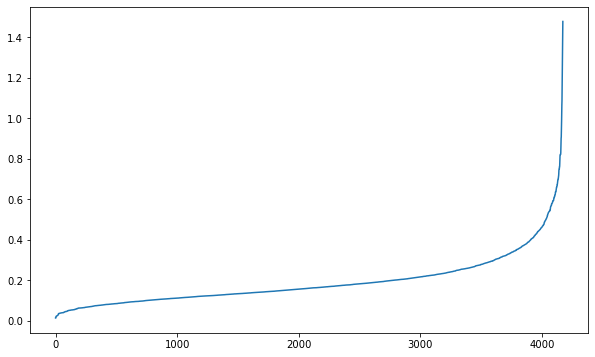

In [53]:
# Sort & plot the distances 
distances = np.sort(distances, axis = 0)
distances = distances[:, 1] 
plt.rcParams['figure.figsize'] = (10,6)
plt.plot(distances)
plt.show()

The maximum curvature happens at about 0.6, so we choose it for our Eps. We needed to find it though neares neighbours, because when eps is too small, majority of data points will be considered outliers. If eps is too large, then the clusters merge and most of the data points will be in the same clusters.

In [54]:
# Fit DBSCAN using the PCA transformed data, using MinPoints = 14 and Eps = 0.6.
from sklearn.cluster import DBSCAN

# cluster the data 
dbscan = DBSCAN(eps = 0.6, min_samples = 6).fit(scores_pca) # fitting the model
labels = dbscan.labels_ # getting the labels

In [55]:
loadings_df

PC1       PC2       PC3       PC4       PC5       PC6  \
variable                                                                 
CDMEMORY    0.245707  0.395466 -0.269608 -0.306683  0.005965  0.242228   
CDGLOBAL    0.235451  0.407955 -0.255843 -0.374967 -0.049553  0.311245   
MMSCORE    -0.248032 -0.338766 -0.096809  0.015905 -0.075886  0.265831   
MOCASCORE  -0.267180 -0.186533 -0.249414 -0.041956  0.007940  0.135984   
LDELTOTAL  -0.267832 -0.044270  0.314227 -0.490179  0.265141 -0.002015   
LIMMTOTAL  -0.266424 -0.064817  0.244591 -0.520187  0.326553 -0.004957   
AVTOT5     -0.288710  0.208074 -0.038100  0.105798  0.013801  0.038775   
AVTOT4     -0.285338  0.240558 -0.065052  0.127905  0.040904 -0.016189   
AVTOT6     -0.279526  0.262620  0.062278  0.068812 -0.052002  0.019117   
AVTOT3     -0.279214  0.267395 -0.086302  0.154647  0.103831 -0.084263   
AVDEL30MIN -0.264892  0.318301  0.065445  0.096280 -0.074194  0.008317   
AVDELTOT   -0.238954  0.014402  0.325797 -0.012632 -0.609773  0.532562   
AVTOT2     -0.260507  0.284997 -0.143991  0.164276  0.203652 -0.158929   
CATANIMSC  -0.222861 -0.094576 -0.395103 -0.398160 -0.557192 -0.545227   
TRABSCOR    0.207140  0.296882  0.572221 -0.036200 -0.264832 -0.373914   

                 PC7       PC8       PC9      PC10      PC11      PC12  \
variable                                                                 
CDMEMORY    0.097708  0.013358  0.021008 -0.009930  0.049206 -0.128695   
CDGLOBAL    0.148374  0.003281 -0.079478  0.062041 -0.040523  0.095207   
MMSCORE     0.588377  0.105773 -0.415186  0.443961  0.056673 -0.036736   
MOCASCORE   0.415061  0.233765  0.627547 -0.431742 -0.035932 -0.020203   
LDELTOTAL  -0.056809  0.018488  0.011355  0.030110  0.046106  0.000546   
LIMMTOTAL  -0.036802 -0.098732 -0.021552 -0.024633 -0.001357  0.017800   
AVTOT5      0.018076  0.078270 -0.349211 -0.335041 -0.266924  0.392583   
AVTOT4      0.067845 -0.067756 -0.315661 -0.366076  0.091912  0.239394   
AVTOT6     -0.137792  0.400902 -0.063479  0.090919 -0.553318 -0.567832   
AVTOT3      0.087550 -0.269035 -0.093381 -0.132332  0.551964 -0.550656   
AVDEL30MIN -0.175131  0.525002  0.231410  0.377820  0.441018  0.321337   
AVDELTOT   -0.168168 -0.357923  0.145379 -0.037668 -0.000129 -0.002937   
AVTOT2      0.163386 -0.520897  0.333413  0.433211 -0.322391  0.178540   
CATANIMSC  -0.101281 -0.045277 -0.066321  0.043161  0.003980  0.006378   
TRABSCOR    0.563833  0.054299  0.043182 -0.072748 -0.018345  0.005359   

                PC13      PC14      PC15  
variable                                  
CDMEMORY    0.720137 -0.091123  0.040405  
CDGLOBAL   -0.650071  0.084592 -0.010264  
MMSCORE     0.075711 -0.022573 -0.002871  
MOCASCORE  -0.048469  0.009907  0.003570  
LDELTOTAL  -0.018924 -0.050751  0.712266  
LIMMTOTAL   0.049329  0.038914 -0.686511  
AVTOT5      0.163900  0.600756  0.072238  
AVTOT4     -0.057299 -0.725114 -0.022538  
AVTOT6     -0.063960 -0.119377 -0.047673  
AVTOT3     -0.098673  0.277471  0.020130  
AVDEL30MIN  0.026469  0.022300 -0.088552  
AVDELTOT    0.040127 -0.009115 -0.017307  
AVTOT2      0.031500 -0.031624  0.042313  
CATANIMSC   0.016603  0.005119  0.009359  
TRABSCOR    0.019634  0.017246 -0.034606

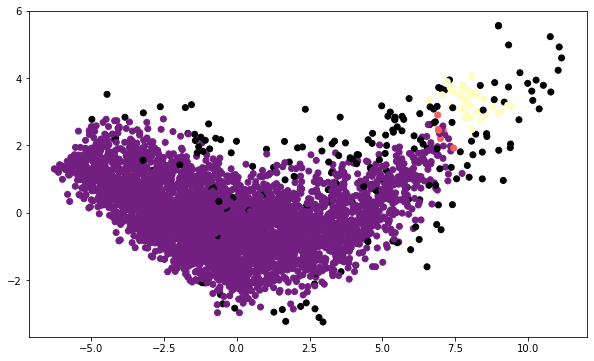

In [56]:
# Plot the clusters
plt.scatter(scores_pca[:, 0], scores_pca[:,1], c = labels, cmap= 'magma') # plotting the clusters
plt.xlabel('') 
plt.ylabel('') 
plt.show() 

### K-Means with PCA-reduced data

What if we use the PCA-reduced data with K-Means?

In [57]:
# Retain 2 PCs, fit the model to our data. Accounting for 74.7% of variance.
explained_var = var1 + var2
print(explained_var)
n_components = 2
pca = PCA(n_components=n_components)
pca.fit(data)
pca.transform(data)
scores_pca = pca.transform(data)
scores_pca.shape

[74.66]


(4172, 2)

In [58]:
# We tried elbow method, clusters should be 3 or 4.
# Let's try 4, since MCI and NC indicate a need for an additional cluster.
kmeanModel = KMeans(n_clusters=4)
kmeanModel.fit(scores_pca)

k_means_labels = kmeanModel.labels_
k_means_cluster_centers = kmeanModel.cluster_centers_

adni_data['Label'] = kmeanModel.labels_
adni_data['Label'] = adni_data['Label'].astype('category')
adni_data.head()

RID   Phase VISCODE   DX diagnosis  year_of_birth  PTGENDER  PTEDUCAT  \
0    2  ADNIGO     m60  1.0        NC           1931       1.0      16.0   
1    2   ADNI2     v06  1.0        NC           1931       1.0      16.0   
2    2   ADNI2     v11  2.0       MCI           1931       1.0      16.0   
3    2   ADNI2     v21  1.0        NC           1931       1.0      16.0   
4    2   ADNI2     v41  1.0        NC           1931       1.0      16.0   

   PTRACCAT  CDMEMORY  ...    AVTOT4    AVTOT6    AVTOT3  AVDEL30MIN  \
0       5.0  0.000000  ...  0.466667  0.466667  0.533333    0.166667   
1       5.0  0.000000  ...  0.600000  0.000000  0.600000    0.111111   
2       5.0  0.166667  ...  0.600000  0.533333  0.533333    0.083333   
3       5.0  0.000000  ...  0.533333  0.400000  0.533333    0.083333   
4       5.0  0.000000  ...  0.533333  0.400000  0.400000    0.055556   

   AVDELTOT    AVTOT2  CATANIMSC  TRABSCOR  Label  Diagnosis  
0  0.533333  0.466667   0.200000  0.166667      3         NC  
1  0.666667  0.600000   0.150000  0.064257      3         NC  
2  0.533333  0.333333   0.200000  0.133534      1        MCI  
3  0.733333  0.466667   0.133333  0.167671      3         NC  
4  0.733333  0.333333   0.133333  0.162651      3         NC  

[5 rows x 26 columns]

In [59]:
label = kmeanModel.fit_predict(scores_pca)
print(label)

[0 0 1 ... 1 1 0]


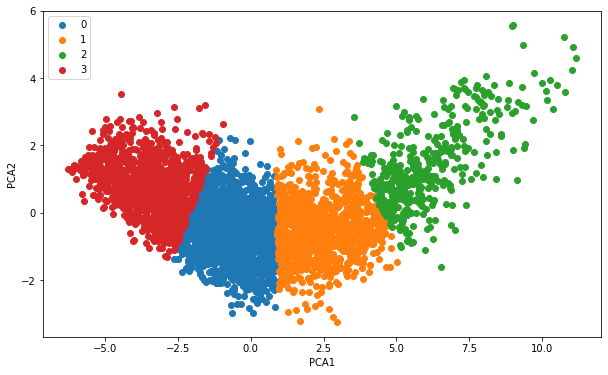

In [60]:
# Plot result
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(scores_pca[label == i , 0] , scores_pca[label == i , 1] , label = i)
    plt.xlabel('PCA1') 
    plt.ylabel('PCA2') 
plt.legend()
plt.show()

In [61]:
px.scatter(adni_data, 
           x='year_of_birth', 
           y='LIMMTOTAL', 
           color='Label',
           color_discrete_sequence=[
               'orange', '#27b052', 'blue', '#ff6361'],
           labels=dict(year_of_birth='Year of Birth', LIMMTOTAL='Normalized logical memory score', Label='Cluster'),
           title='Clusters predicted with K-Means, logical memory score per age')

In [62]:
px.scatter(adni_data, 
           x='year_of_birth', 
           y='LIMMTOTAL',  
           color='Diagnosis', 
           color_discrete_sequence=[
               'blue', '#27b052', '#ff6361'],
           labels=dict(year_of_birth='Year of Birth', LIMMTOTAL='Normalized logical memory score', Label='Cluster'),
           title='Diagnosis-based groups, logical memory score per age')

In [63]:
# Performance metrics
sm.accuracy_score(adni_data.DX, k_means_labels)

0.030441035474592523

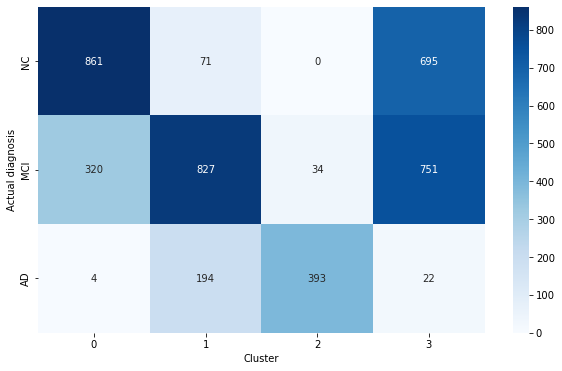

In [64]:
# Confusion matrix
adni_data['Label'] = k_means_labels
actual = adni_data['Diagnosis']
cluster = adni_data['Label']
confusion_matrix = pd.crosstab(actual, cluster, rownames=['Actual diagnosis'], colnames=['Cluster'])

sns.heatmap(confusion_matrix, fmt='', cmap='Blues', annot=True)
plt.show()

In [65]:
# Rand index
labels_true = adni_data['Diagnosis']
labels_pred = adni_data['Label']
sm.rand_score(labels_true, labels_pred)

0.6470028983854873

### DBSCAN with 2 PCs

In [66]:
# Retain 2 PCs, fit the model to our data. Accounting for 74.7% of variance.
explained_var = var1 + var2
print(explained_var)
pca = PCA(n_components = 2)
pca.fit(data)
pca.transform(data)
scores_pca = pca.transform(data)
scores_pca.shape

[74.66]


(4172, 2)

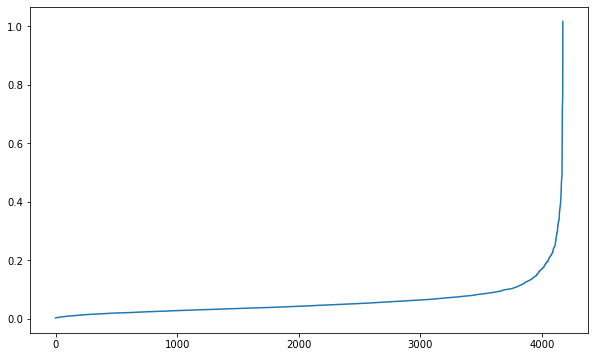

In [67]:
# MinPoints = 2x2 = 4

# Compute distances with NearestNeighbors
from sklearn.neighbors import NearestNeighbors
neighb = NearestNeighbors(n_neighbors=2)
nbrs = neighb.fit(scores_pca) # fitting the data to the object
distances, indices = nbrs.kneighbors(scores_pca) # finding the nearest neighbours

# Sort & plot the distances to assess ɛ
distances = np.sort(distances, axis = 0)
distances = distances[:, 1] 
plt.rcParams['figure.figsize'] = (10,6)
plt.plot(distances)
plt.show()

In [68]:
# Fit DBSCAN using the PCA transformed data, using MinPoints = 4 and Eps = 0.3.
# cluster the data 
dbscan = DBSCAN(eps = 0.3, min_samples = 6).fit(scores_pca) # fitting the model
labels = dbscan.labels_ # getting the labels

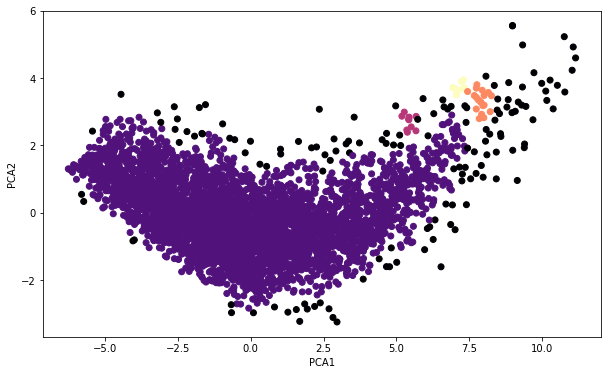

In [69]:
# Plot the clusters
plt.scatter(scores_pca[:, 0], scores_pca[:,1], c = labels, cmap= 'magma') # plotting the clusters
plt.xlabel('PCA1') 
plt.ylabel('PCA2') 
plt.show() 

In [70]:
adni_data['Label'] = dbscan.labels_
adni_data['Label'] = adni_data['Label'].astype('category')
print(adni_data['Label'].unique())
adni_data.head()

[0, -1, 1, 2, 3]
Categories (5, int64): [0, -1, 1, 2, 3]


RID   Phase VISCODE   DX diagnosis  year_of_birth  PTGENDER  PTEDUCAT  \
0    2  ADNIGO     m60  1.0        NC           1931       1.0      16.0   
1    2   ADNI2     v06  1.0        NC           1931       1.0      16.0   
2    2   ADNI2     v11  2.0       MCI           1931       1.0      16.0   
3    2   ADNI2     v21  1.0        NC           1931       1.0      16.0   
4    2   ADNI2     v41  1.0        NC           1931       1.0      16.0   

   PTRACCAT  CDMEMORY  ...    AVTOT4    AVTOT6    AVTOT3  AVDEL30MIN  \
0       5.0  0.000000  ...  0.466667  0.466667  0.533333    0.166667   
1       5.0  0.000000  ...  0.600000  0.000000  0.600000    0.111111   
2       5.0  0.166667  ...  0.600000  0.533333  0.533333    0.083333   
3       5.0  0.000000  ...  0.533333  0.400000  0.533333    0.083333   
4       5.0  0.000000  ...  0.533333  0.400000  0.400000    0.055556   

   AVDELTOT    AVTOT2  CATANIMSC  TRABSCOR  Label  Diagnosis  
0  0.533333  0.466667   0.200000  0.166667      0         NC  
1  0.666667  0.600000   0.150000  0.064257      0         NC  
2  0.533333  0.333333   0.200000  0.133534      0        MCI  
3  0.733333  0.466667   0.133333  0.167671      0         NC  
4  0.733333  0.333333   0.133333  0.162651      0         NC  

[5 rows x 26 columns]

In [71]:
# DBSCAN identified 5 different clusters, let's take a look how they coincide with diagnosis.
px.scatter(adni_data, 
           x='year_of_birth', 
           y='LIMMTOTAL', 
           color='Label',
           color_discrete_sequence=[
               'orange', '#27b052', 'blue', '#ff6361', 'red'],
           title='Clusters predicted with K-Means, y axis represents logical memory score')

In [72]:
adni_data.head()

RID   Phase VISCODE   DX diagnosis  year_of_birth  PTGENDER  PTEDUCAT  \
0    2  ADNIGO     m60  1.0        NC           1931       1.0      16.0   
1    2   ADNI2     v06  1.0        NC           1931       1.0      16.0   
2    2   ADNI2     v11  2.0       MCI           1931       1.0      16.0   
3    2   ADNI2     v21  1.0        NC           1931       1.0      16.0   
4    2   ADNI2     v41  1.0        NC           1931       1.0      16.0   

   PTRACCAT  CDMEMORY  ...    AVTOT4    AVTOT6    AVTOT3  AVDEL30MIN  \
0       5.0  0.000000  ...  0.466667  0.466667  0.533333    0.166667   
1       5.0  0.000000  ...  0.600000  0.000000  0.600000    0.111111   
2       5.0  0.166667  ...  0.600000  0.533333  0.533333    0.083333   
3       5.0  0.000000  ...  0.533333  0.400000  0.533333    0.083333   
4       5.0  0.000000  ...  0.533333  0.400000  0.400000    0.055556   

   AVDELTOT    AVTOT2  CATANIMSC  TRABSCOR  Label  Diagnosis  
0  0.533333  0.466667   0.200000  0.166667      0         NC  
1  0.666667  0.600000   0.150000  0.064257      0         NC  
2  0.533333  0.333333   0.200000  0.133534      0        MCI  
3  0.733333  0.466667   0.133333  0.167671      0         NC  
4  0.733333  0.333333   0.133333  0.162651      0         NC  

[5 rows x 26 columns]

In [73]:
# Rand index
labels_true = adni_data['Diagnosis']
labels_pred = adni_data['Label']
sm.rand_score(labels_true, labels_pred)

0.4360892093124397